# Background subtraction for spatial maps in focus beam and slit beam

In [24]:
%run -i ../tomography/utils.py

In [25]:
%run -i startup3.py

## Extract the peak positions

### Load the light and dark frame of the focus beam

In [5]:
shadows1 = xr.load_dataarray("/Volumes/STAO_EXT/test_filtered_frames_array.nc")

In [11]:
shadows1

<xarray.DataArray (dim_0: 2, dim_1: 3888, dim_2: 3072)>
array([[[499., 422., 502., ..., 601., 584., 606.],
        [475., 458., 454., ..., 472., 549., 537.],
        [395., 464., 415., ..., 501., 474., 514.],
        ...,
        [524., 537., 515., ..., 456., 464., 429.],
        [545., 548., 528., ..., 563., 414., 502.],
        [590., 572., 595., ..., 492., 497., 465.]],

       [[554., 769., 557., ..., 659., 641., 664.],
        [540., 513., 534., ..., 526., 606., 603.],
        [449., 524., 475., ..., 560., 532., 567.],
        ...,
        [579., 594., 576., ..., 517., 522., 482.],
        [617., 610., 752., ..., 617., 476., 573.],
        [653., 630., 658., ..., 545., 576., 523.]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

### Load the peak info of the light frame and create windows

In [9]:
peaks = db_csv.get_data("60c140527b072673151c761e")
peaks = peaks.sort_values("mass", ascending=False).iloc[:20]
windows = create_windows_from_width(peaks, 50)

In [28]:
windows

,x,y,dx,dy
56,195,3832,50,50
48,1447,3363,50,50
54,986,3703,50,50
13,115,1607,50,50
47,548,3214,50,50
2,2435,306,50,50
24,2368,2050,50,50
53,2374,3659,50,50
37,1895,2738,50,50
46,698,3209,50,50


### Average the intensity on the dark frame in the windows

In [26]:
dark = average_intensity(shadows1[0], windows)

In [27]:
dark

<xarray.DataArray (grain: 20)>
array([473.225 , 488.5159, 467.2629, 425.2629, 460.6463, 450.4409,
       448.0662, 449.1955, 448.5658, 475.3257, 446.8077, 456.7319,
       464.4291, 474.7   , 463.4532, 463.4085, 427.21  , 441.5243,
       435.9717, 474.3043])
Dimensions without coordinates: grain

### Load the grain maps of the focus beam

In [37]:
grains = db_cdf.get_data("60d4dad53652b26d789f32df")

In [100]:
metadata = db_cdf.get_md("60d4dad53652b26d789f32df")

In [42]:
grains["maps"].attrs["standard_name"] = "focus beam"

In [38]:
grains

<xarray.Dataset>
Dimensions:  (dim_0: 181, dim_1: 27, grain: 20)
Coordinates:
  * dim_0    (dim_0) float64 0.0 0.25 0.5 0.75 1.0 ... 44.25 44.5 44.75 45.0
  * dim_1    (dim_1) float64 6.5 6.25 6.0 5.75 5.5 ... 1.0 0.75 0.5 0.25 0.0
  * grain    (grain) int32 56 48 54 13 47 2 24 53 37 ... 55 52 28 25 18 19 21 7
Data variables:
    maps     (dim_0, dim_1, grain) float64 503.5 525.7 498.2 ... 464.5 502.6
    x        (grain) int32 195 1447 986 115 548 2435 ... 449 113 2358 861 634
    y        (grain) int32 3832 3363 3703 1607 3214 ... 2131 1721 1750 1803 1122
    dx       (grain) int32 50 50 50 50 50 50 50 50 ... 50 50 50 50 50 50 50 50
    dy       (grain) int32 50 50 50 50 50 50 50 50 ... 50 50 50 50 50 50 50 50

### Subtract the grain maps by the dark value

In [39]:
grains["maps"] -= dark

### Visualize the grain maps

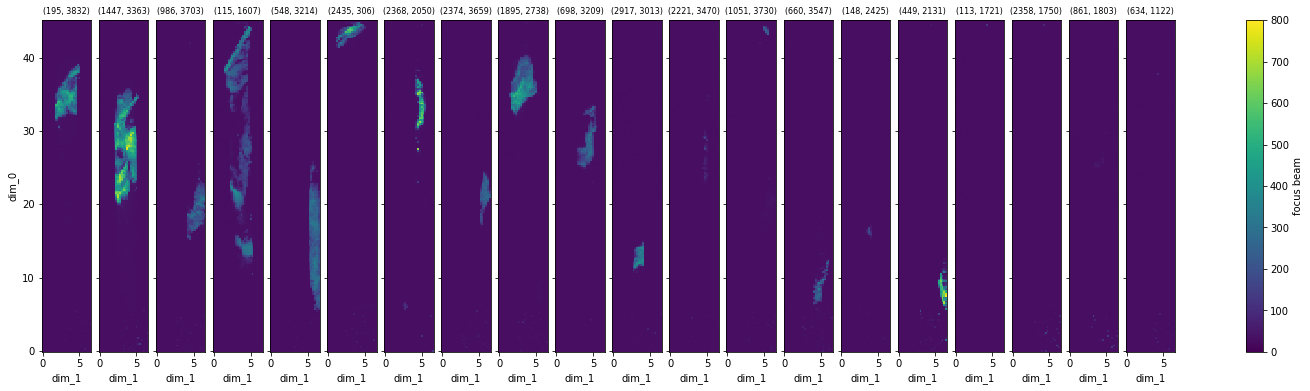

In [97]:
facet = plot_grain_maps(grains.set_index({"grain": ["x", "y"]}), vmin=0, vmax=800)
facet.set_titles(template="{value}", size=8)
del facet

## Do the same to the data of slit beam

In [144]:
metadata2 = db_cdf.get_md("60c949ff07de20d7d30c65fd")

In [145]:
grains2 = db_cdf.get_data("60c949ff07de20d7d30c65fd")
grains2

<xarray.Dataset>
Dimensions:  (dim_0: 181, dim_1: 25, grain: 20)
Coordinates:
  * dim_0    (dim_0) float64 45.0 44.75 44.5 44.25 44.0 ... 0.75 0.5 0.25 0.0
  * dim_1    (dim_1) float64 6.0 5.75 5.5 5.25 5.0 ... 1.0 0.75 0.5 0.25 0.0
    x        (grain) int32 1442 191 111 2431 543 978 ... 2359 1104 1370 852 626
    y        (grain) int32 3336 3805 1581 281 3187 ... 2042 483 2929 1770 1102
Dimensions without coordinates: grain
Data variables:
    maps     (grain, dim_0, dim_1) float64 516.8 517.9 516.6 ... 506.4 507.1
    dx       (grain) int32 50 50 50 50 50 50 50 50 ... 50 50 50 50 50 50 50 50
    dy       (grain) int32 50 50 50 50 50 50 50 50 ... 50 50 50 50 50 50 50 50

In [146]:
grains2["maps"].attrs["standard_name"] = "slit beam"

In [147]:
peaks = db_csv.get_data("60c931f307de20d7d30c65fc")
peaks = peaks.sort_values("mass", ascending=False).iloc[:20]
windows = create_windows_from_width(peaks, 50)

In [148]:
features = db_cdf.get_data("60c9246507de20d7d30c65fb")

In [149]:
dark = average_intensity(features["shadow"][0], windows)
grains2["maps"] -= dark

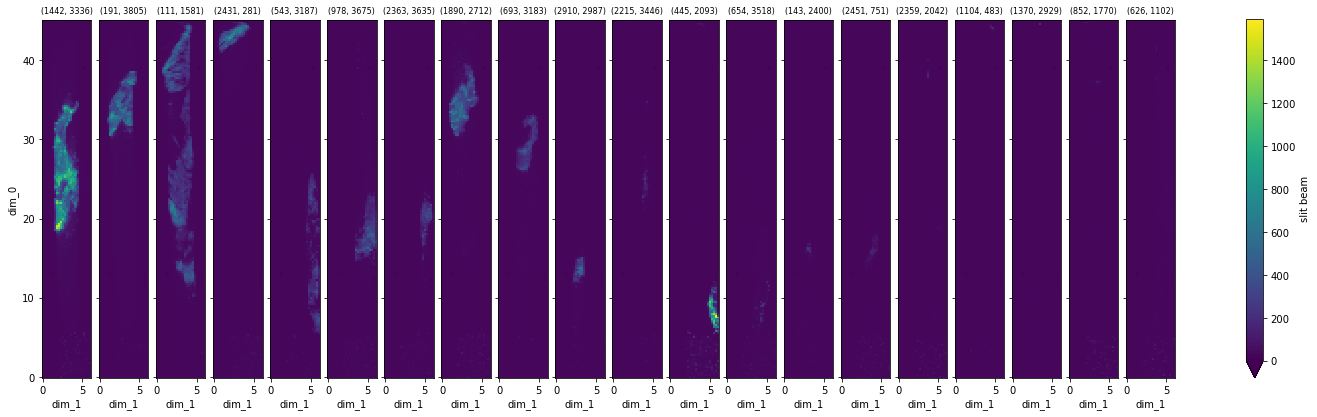

In [150]:
facet = plot_grain_maps(grains2.set_index({"grain": ["x", "y"]}), vmin=0)
facet.set_titles(template="{value}", size=8)
del facet

## Save the two processed data and compare

In [101]:
# db_cdf.insert(grains, metadata)

'60dcbf1f95279d6b19ce8811'

In [104]:
# db_cdf.insert(grains2, metadata2)

'60dcbf5d95279d6b19ce8812'

## Compare the results

In [162]:
grains = db_cdf.get_data("60dcbf1f95279d6b19ce8811")
grains2 = db_cdf.get_data("60dcbf5d95279d6b19ce8812")

In [163]:
grains = grains.set_index({"grain": ["x", "y"]})
grains2 = grains2.set_index({"grain": ["x", "y"]})

In [171]:
grains = grains.sortby([grains["x"] / grains["y"], grains["x"] ** 2 + grains["y"] ** 2])
grains2 = grains2.sortby([grains2["x"] / grains2["y"], ])

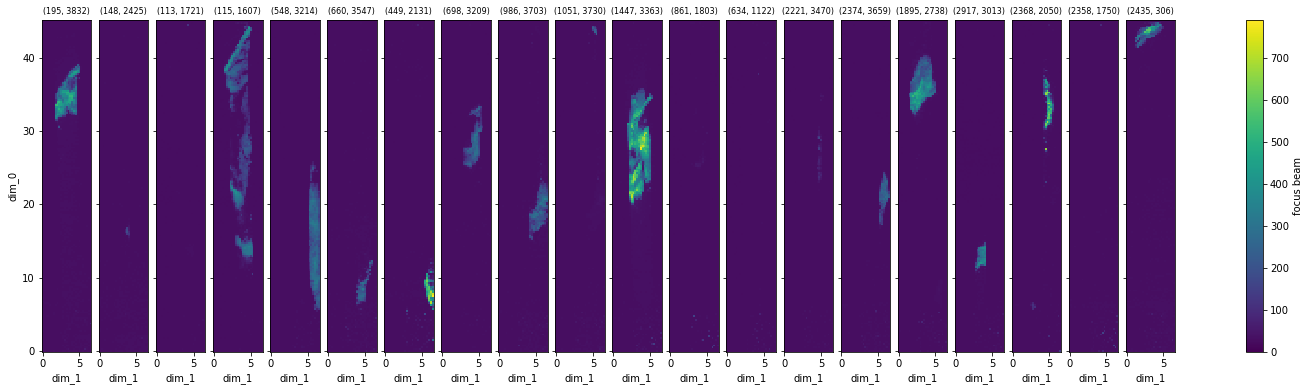

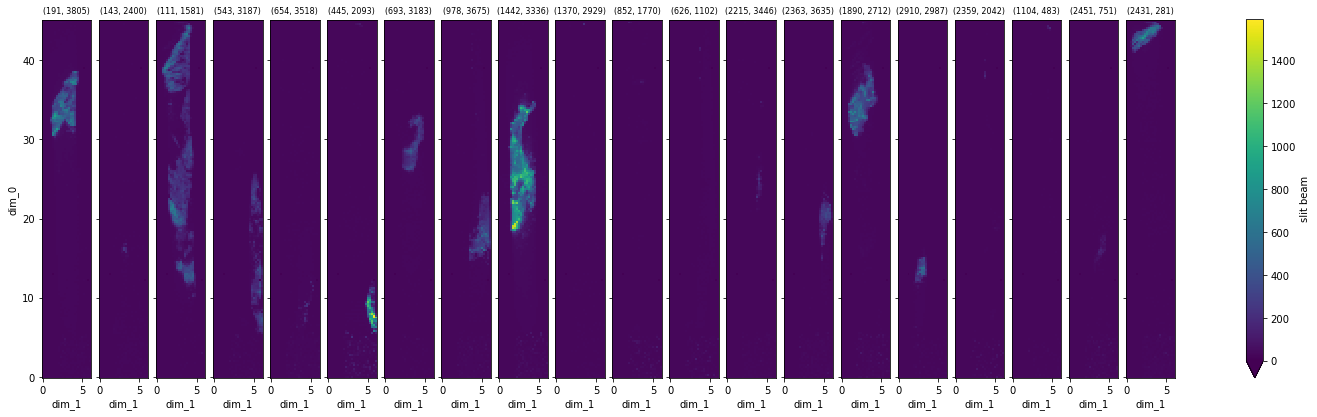

In [172]:
facet = plot_grain_maps(grains, vmin=0)
facet.set_titles(template="{value}", size=8)
facet = plot_grain_maps(grains2, vmin=0)
facet.set_titles(template="{value}", size=8)
del facet

In [127]:
mean = grains["maps"].mean(dim=["dim_0", "dim_1"])
mean2 = grains2["maps"].mean(dim=["dim_0", "dim_1"])

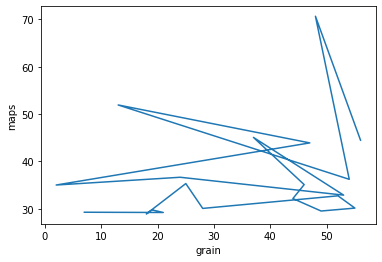

In [128]:
mean.plot()